In [18]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# A1, 주민, 
# A2, 소득이 5000 달러 미만인 가정의 비율,
# A3, 실업자 비율,
# B, 연간 인구 1,000,000 명당 살인 건수.

data = pd.read_csv(
    './dataset/linear.txt',
    skiprows=28, 
    dtype=np.float32, 
    delimiter=' ', 
    names=['unemploy','murders'], 
    usecols=range(2,4)
)
data.head()

,unemploy,murders
0,6.2,11.200000
1,6.4,13.400000
2,9.3,40.700001
3,5.3,5.300000
4,7.3,24.799999


In [20]:
# data.plot(kind='scatter', x='people', y='murders', grid=1)
# plt.xlabel('people')
# plt.ylabel('murders')
# plt.show()

In [21]:
# data.plot(kind='scatter', x='poor', y='murders', grid=1)
# plt.xlabel('poor')
# plt.ylabel('murders')
# plt.show()

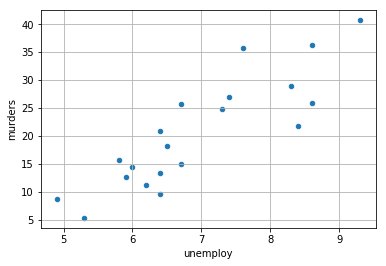

In [22]:
data.plot(kind='scatter', x='unemploy', y='murders', grid=1)
plt.xlabel('unemploy')
plt.ylabel('murders')
plt.show()

In [23]:
# print(data.weight.shape)
# print(data.brain.shape)

# data = data.query('weight<1200 and brain<2000')

# print(data.weight.shape)
# print(data.brain.shape)

# data.plot(kind='scatter', x='brain', y='weight', grid=1)
# plt.show()

In [24]:
data[['unemploy', 'murders']] = preprocessing.MinMaxScaler().fit_transform(data[['unemploy', 'murders']])
print(data.head())
data.plot(kind='scatter', x='unemploy', y='murders', grid=1)
plt.xlabel('unemploy')
plt.ylabel('murders')
plt.show()

NameError: name 'preprocessing' is not defined

In [ ]:
rows = len(data.unemploy)
xdata = data.unemploy.values.reshape(rows,1)
ydata = data.murders.values.reshape(rows,1)
print(xdata.shape)
print(ydata.shape)

ydata

In [8]:
X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])

In [9]:
# y = W*X+B

W = tf.Variable(tf.random_uniform([1],-1.,1.), dtype=tf.float32)
# W = tf.get_variable('W', shape=[1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_uniform([1],-1.,1.), dtype=tf.float32)

In [10]:
H = W*X+b

In [11]:
C = tf.reduce_mean(tf.square(H-Y))

In [12]:
T = tf.train.GradientDescentOptimizer(0.01).minimize(C)

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
history = {
    'w' : [],
    'c' : []
}

for step in range(1000):
    _,c,w,tb = sess.run([T,C,W,b], feed_dict={X: xdata, Y: ydata})
    
    history['w'].append(w)
    history['c'].append(c)
        
    if step % 50 == 0:
#         print(w.shape, tb)
        print(step, c)

NameError: name 'xdata' is not defined

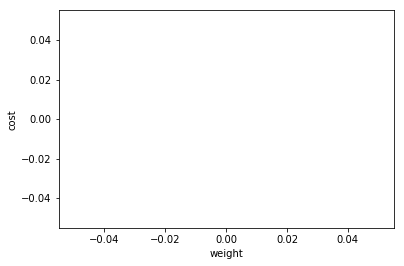

In [15]:
plt.plot(history['w'], history['c'])
plt.xlabel('weight')
plt.ylabel('cost')
plt.show()

In [16]:
plt.plot(xdata, ydata, 'o')
plt.plot(xdata, (sess.run(W)*xdata+sess.run(b)))
plt.xlabel('unemploy')
plt.ylabel('murders')
plt.show()

NameError: name 'xdata' is not defined

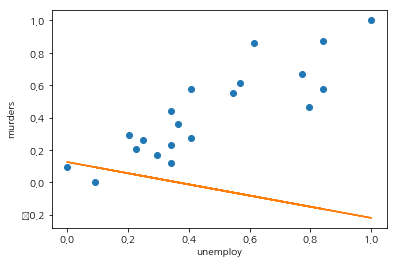

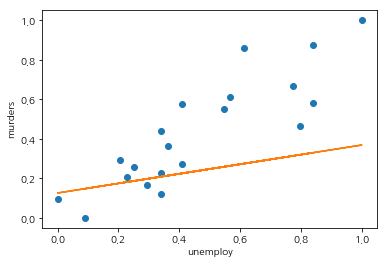

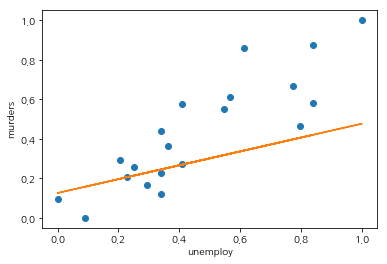

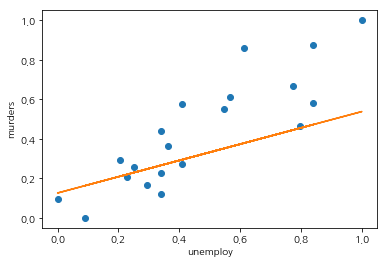

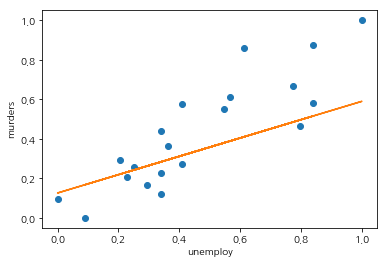

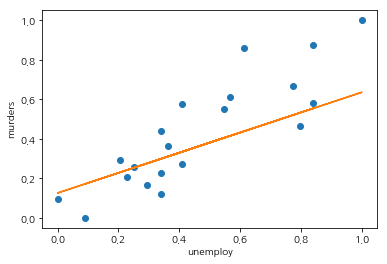

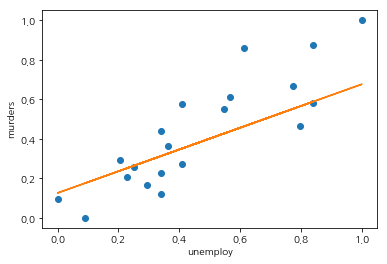

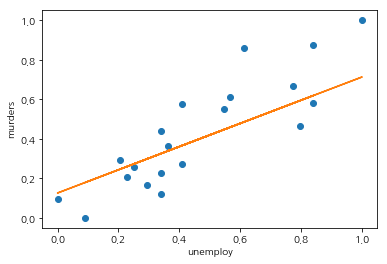

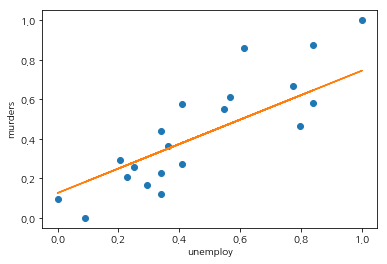

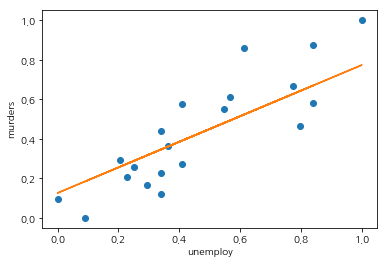

In [64]:
for i, w in enumerate(history['w']):
    if i % 100 == 0:
        plt.plot(xdata, ydata, 'o')
        plt.plot(xdata, (w*xdata+sess.run(b)))
        plt.xlabel('unemploy')
        plt.ylabel('murders')
        plt.show()



In [19]:
px = 6.2
py = sess.run(H, feed_dict={X:[[px]]})
py

array([[ 5.47999144]], dtype=float32)

In [66]:
# data.plot(kind='scatter', x='unemploy', y='murders', grid=1)
# plt.xlabel('unemploy')
# plt.ylabel('murders')
# plt.plot(px, py, 'o', c='red')
# plt.show()

In [21]:
sess.close()